In [17]:
import pandas as pd

In [184]:
ads=pd.read_csv('facebook_ads_data.csv')

In [186]:
ads

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [48]:
ad_date_data_type = ads['ad_date'].dtype
print(ad_date_data_type)

datetime64[ns]


In [52]:
import pandas as pd
grouped_by_day=ads.groupby(ads['ad_date'].dt.day)
#count_per_day = grouped_by_day.size()

#print(count_per_day)

ad_date
1     47
2     47
3     45
4     44
5     49
6     46
7     48
8     46
9     52
10    50
11    48
12    50
13    51
14    51
15    49
16    50
17    50
18    51
19    54
20    53
21    50
22    50
23    45
24    49
25    49
26    45
27    52
28    52
29    48
30    45
31    28
dtype: int64


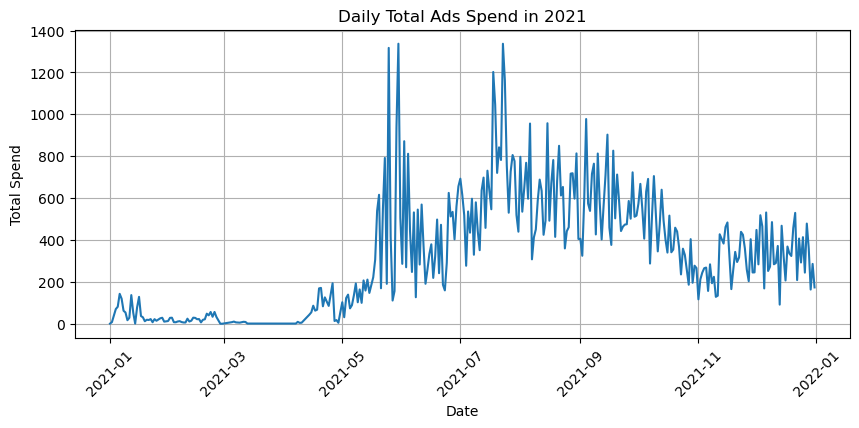

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ads_2021 = ads[ads['ad_date'].dt.year == 2021]

daily_total_spend_2021 = ads_2021.groupby(ads_2021['ad_date'].dt.date)['total_spend'].sum()
plt.figure(figsize=(10, 4))
plt.plot(daily_total_spend_2021.index, daily_total_spend_2021.values)
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.title('Daily Total Ads Spend in 2021')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


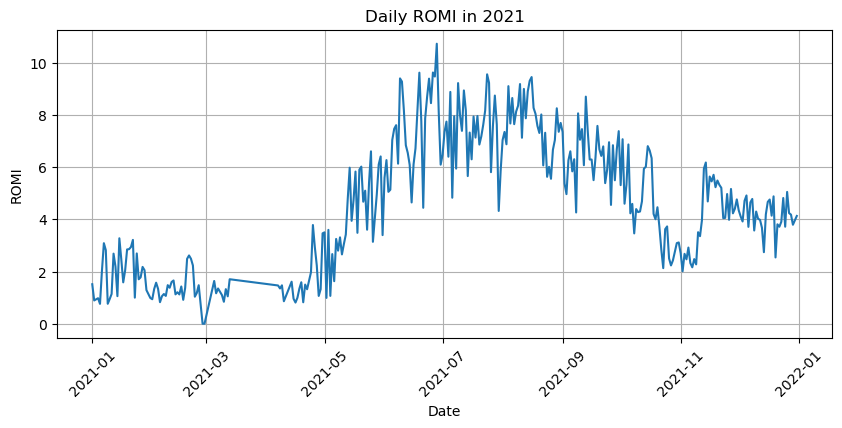

In [100]:
ads_2021 = ads[ads['ad_date'].dt.year == 2021]

daily_romi_2021 = ads_2021.groupby(ads_2021['ad_date'].dt.date)['romi'].sum()
plt.figure(figsize=(10, 4))
plt.plot(daily_romi_2021.index, daily_romi_2021.values)
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.title('Daily ROMI in 2021')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [152]:
import pandas as pd
grouped_by_campaign_name=ads.groupby(ads['campaign_name'])
count = grouped_by_campaign_name.size()

print(count)

campaign_name
Brand              100
Crazy discounts    124
Discounts          101
Electronics        174
Expansion          116
Hobbies            103
Lookalike          235
New items          100
Promos             145
Trendy              94
Wholesale          202
dtype: int64


In [208]:
df = pd.DataFrame(ads)

window_size = 2
df['total_value_moving_avg'] = df['total_value'].rolling(window=window_size).mean()

print(df['total_value_moving_avg'])

0           NaN
1         0.000
2        95.935
3       332.240
4       576.475
         ...   
1489     21.935
1490     11.815
1491     11.220
1492     15.450
1493     11.755
Name: total_value_moving_avg, Length: 1494, dtype: float64


In [221]:
df = pd.DataFrame(ads)

window_size = 2
df['romi_moving_avg'] = df['romi'].rolling(window=window_size).mean()

print(df['romi_moving_avg'])

0            NaN
1            NaN
2            NaN
3       1.125262
4       1.179886
          ...   
1489    1.179989
1490    1.656490
1491    1.639471
1492    1.227430
1493    1.088977
Name: romi_moving_avg, Length: 1494, dtype: float64


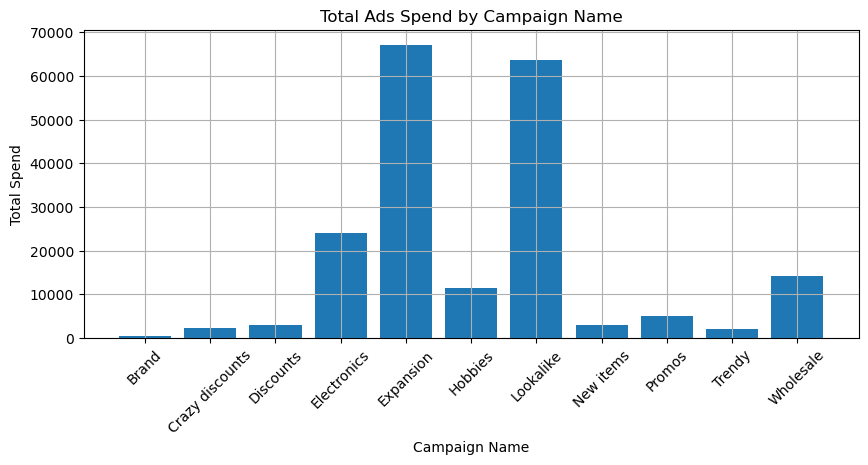

In [154]:
ads_spend = ads.groupby(ads['campaign_name'])['total_spend'].sum()
plt.figure(figsize=(10, 4))
plt.bar(ads_spend.index, ads_spend.values)
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.title('Total Ads Spend by Campaign Name')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

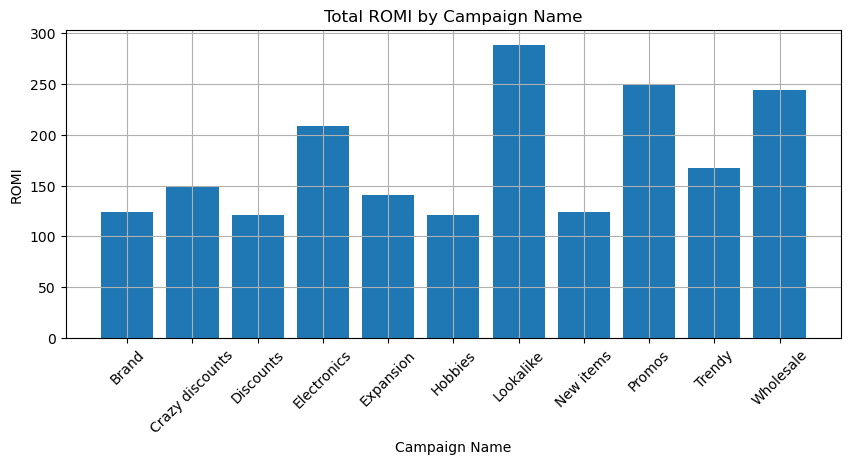

In [148]:
romi_spend = ads.groupby(ads['campaign_name'])['romi'].sum()
plt.figure(figsize=(10, 4))
plt.bar(romi_spend.index, romi_spend.values)
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.title('Total ROMI by Campaign Name')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

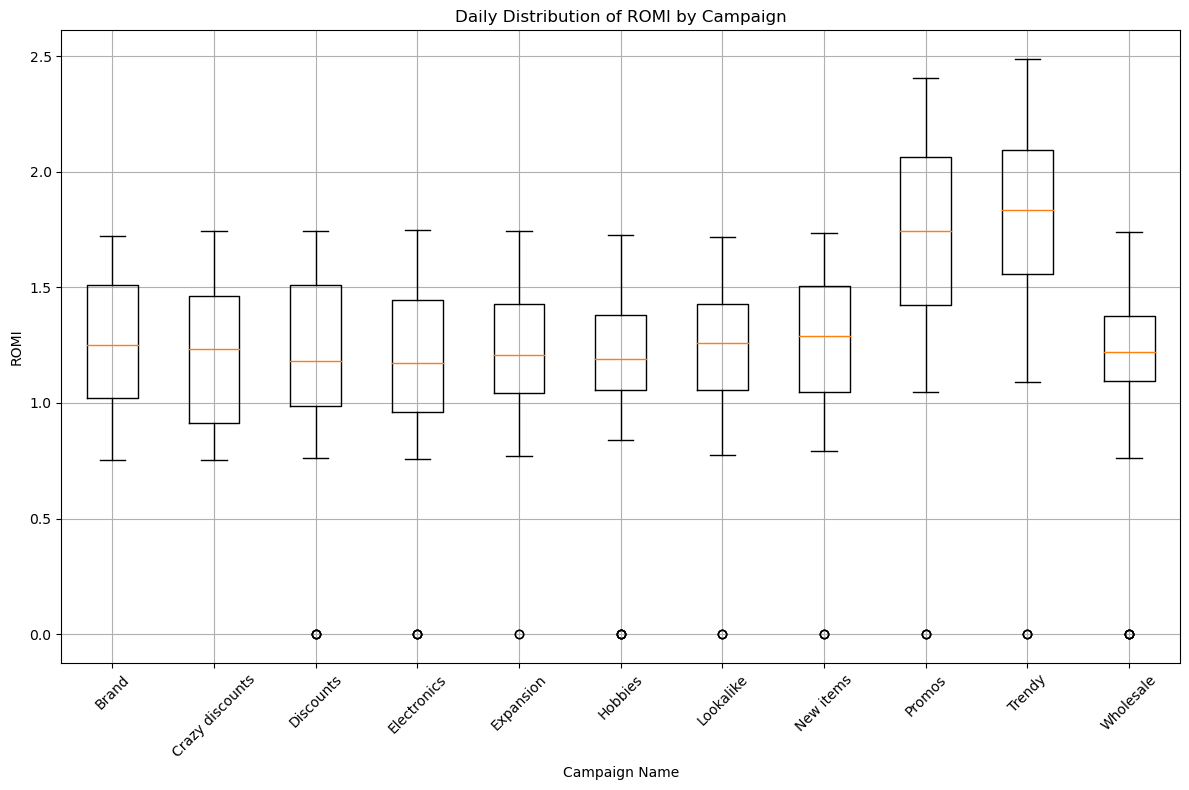

In [305]:
campaign_groups = ads.groupby(['campaign_name', ads['ad_date'].dt.date])['romi'].sum()

boxplot_data = []
labels = []

# Iterate over each campaign
for campaign_name, data in campaign_groups.groupby(level=0):
    boxplot_data.append(data)
    labels.append(campaign_name)

plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=labels)
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.title('Daily Distribution of ROMI by Campaign')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

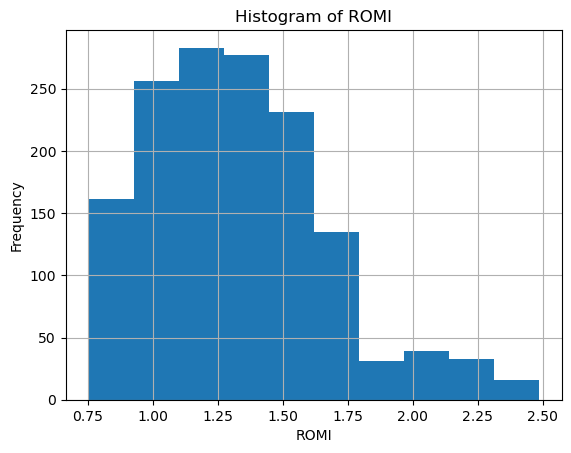

In [313]:
data=ads['romi']
data.hist()
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.title('Histogram of ROMI')
plt.show()

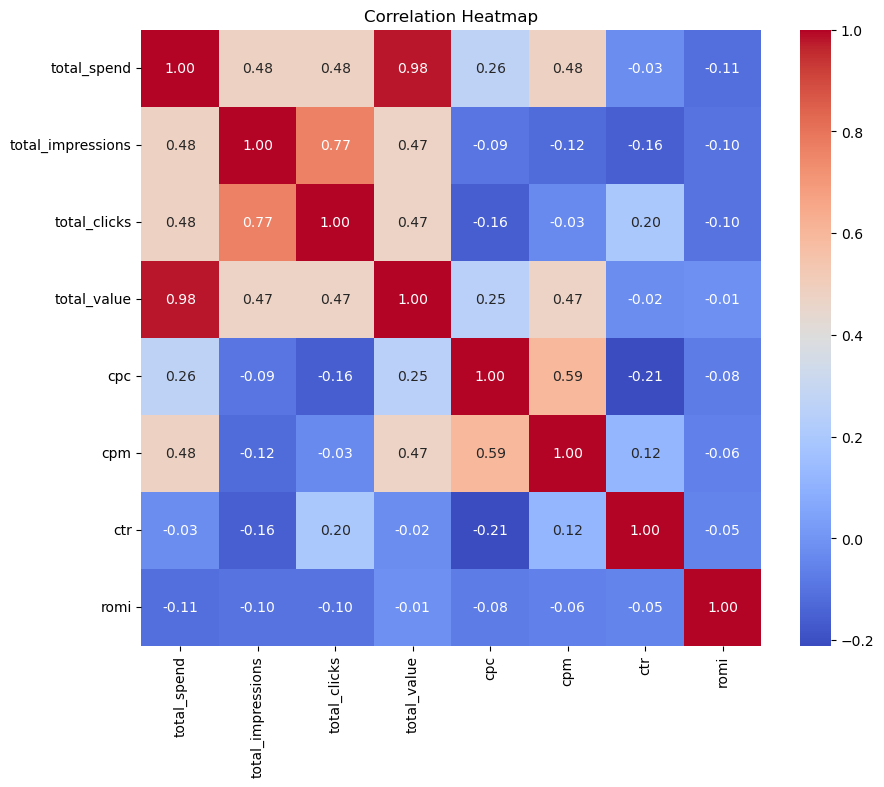

Highest correlation is between total_spend and total_spend: 1.00
Lowest correlation is between cpc and ctr: -0.21

Correlation of 'total_value' with other variables:
total_spend          0.978890
total_impressions    0.472037
total_clicks         0.472124
cpc                  0.250851
cpm                  0.471338
ctr                 -0.022267
romi                -0.013733
Name: total_value, dtype: float64


In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns=ads.drop(['ad_date', 'campaign_name'], axis=1)


correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

max_corr = correlation_matrix.stack().idxmax()
min_corr = correlation_matrix.stack().idxmin()

max_corr_value = correlation_matrix.loc[max_corr[0], max_corr[1]]
min_corr_value = correlation_matrix.loc[min_corr[0], min_corr[1]]

print("Highest correlation is between {} and {}: {:.2f}".format(max_corr[0], max_corr[1], max_corr_value))
print("Lowest correlation is between {} and {}: {:.2f}".format(min_corr[0], min_corr[1], min_corr_value))

total_value_corr = correlation_matrix['total_value'].drop('total_value')
print("\nCorrelation of 'total_value' with other variables:")
print(total_value_corr)

/home/4db6583e-2bb1-4964-9735-49e1d71ef051/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


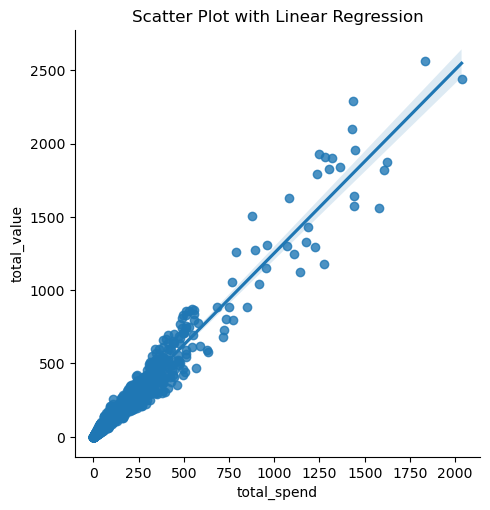

In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="total_spend", y="total_value", data=ads)
plt.title('Scatter Plot with Linear Regression')
plt.show()